# Election Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
results = pd.read_csv('elections-data/results.csv')
locations = pd.read_csv('elections-data/locations.csv')
advertisers = pd.read_csv('elections-data/advertisers.csv')

In [10]:
results.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0


In [11]:
locations.head()

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242


In [12]:
advertisers.head()

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879


In [13]:
results.shape, locations.shape, advertisers.shape


((550, 8), (36, 2), (20832, 5))

In [14]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             550 non-null    int64  
 1   Sl No           543 non-null    float64
 2   State           543 non-null    object 
 3   PC_Name         550 non-null    object 
 4   Total Electors  550 non-null    int64  
 5   Polled (%)      550 non-null    float64
 6   Total Votes     550 non-null    int64  
 7   Phase           492 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 34.5+ KB


In [15]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Location name       36 non-null     object
 1   Amount spent (INR)  36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 708.0+ bytes


In [16]:
advertisers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20832 entries, 0 to 20831
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Page ID                   20832 non-null  int64 
 1   Page name                 20832 non-null  object
 2   Disclaimer                20832 non-null  object
 3   Amount spent (INR)        20832 non-null  object
 4   Number of ads in Library  20832 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 813.9+ KB


In [17]:
results.isnull().sum()

_id                0
Sl No              7
State              7
PC_Name            0
Total Electors     0
Polled (%)         0
Total Votes        0
Phase             58
dtype: int64

In [18]:
locations.isnull().sum()

Location name         0
Amount spent (INR)    0
dtype: int64

In [19]:
advertisers.isnull().sum()

Page ID                     0
Page name                   0
Disclaimer                  0
Amount spent (INR)          0
Number of ads in Library    0
dtype: int64

In [20]:
# View the rows where 'State' is null
print(results[results['State'].isnull()])

     _id  Sl No State        PC_Name  Total Electors  Polled (%)  Total Votes  \
102  103    NaN   NaN  Phase 1 Total       166386344       66.14    110052103   
191  192    NaN   NaN  Phase 2 Total       158645484       66.71    105830572   
285  286    NaN   NaN  Phase 3 Total       172404907       65.68    113234676   
382  383    NaN   NaN  Phase 3 Total       177075629       69.16    122469319   
432  433    NaN   NaN  Phase 5 Total        89567973       62.20     55710618   
491  492    NaN   NaN  Phase 6 Total       111316606       63.37     70544933   
549  550    NaN   NaN  Phase 7 Total       100653884       63.88     64296221   

     Phase  
102    1.0  
191    2.0  
285    3.0  
382    4.0  
432    5.0  
491    6.0  
549    NaN  


In [21]:
results = results.drop(columns=["Sl No"])


In [22]:
results = results.dropna(subset=["State"])


In [23]:
results["Phase"] = results["Phase"].fillna("Unknown")


In [24]:
results.isnull().sum()

_id               0
State             0
PC_Name           0
Total Electors    0
Polled (%)        0
Total Votes       0
Phase             0
dtype: int64

In [25]:
results.describe()


,_id,Total Electors,Polled (%),Total Votes
count,543.000000,5.430000e+02,543.000000,5.430000e+02
mean,274.559853,1.797515e+06,66.552376,1.182575e+06
std,158.804539,3.669258e+05,9.883484,2.480537e+05
min,1.000000,5.778400e+04,38.490000,4.863000e+04
25%,137.500000,1.633828e+06,58.450000,1.053328e+06
50%,274.000000,1.820854e+06,65.440000,1.170009e+06
75%,411.500000,1.980864e+06,74.890000,1.340582e+06
max,549.000000,3.779596e+06,92.080000,2.450041e+06


In [27]:
results.head()

,_id,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,Assam,Jorhat,1727121,79.89,1379749,1.0


In [29]:
results = results.drop(columns=["_id"])

In [30]:
results.columns = (
    results.columns
    .str.strip()             # remove spaces at ends
    .str.lower()             # lowercase
    .str.replace(r"[ %()/]", "_", regex=True)  # replace spaces, %, () with _
    .str.replace("__", "_", regex=True)        # remove double underscores
)

results.head()


,state,pc_name,total_electors,polled__,total_votes,phase
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,Assam,Jorhat,1727121,79.89,1379749,1.0


In [41]:
merged_data = results.merge(
    locations,
    left_on = 'state',
    right_on = 'Location name',
    how = 'left'
)

merged_data.head()

,state,pc_name,total_electors,polled__,total_votes,phase,Location name,Amount spent (INR)
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0,Arunachal Pradesh,1385654.0
2,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0,Arunachal Pradesh,1385654.0
3,Assam,Dibrugarh,1659588,76.75,1273744,1.0,Assam,17478091.0
4,Assam,Jorhat,1727121,79.89,1379749,1.0,Assam,17478091.0


In [35]:
print(results.columns)

Index(['state', 'pc_name', 'total_electors', 'polled__', 'total_votes',
       'phase'],
      dtype='object')


In [ ]:

results[["total_electors", "total_votes", "polled__"]].describe()

,total_electors,total_votes,polled__
count,5.430000e+02,5.430000e+02,543.000000
mean,1.797515e+06,1.182575e+06,66.552376
std,3.669258e+05,2.480537e+05,9.883484
min,5.778400e+04,4.863000e+04,38.490000
25%,1.633828e+06,1.053328e+06,58.450000
50%,1.820854e+06,1.170009e+06,65.440000
75%,1.980864e+06,1.340582e+06,74.890000
max,3.779596e+06,2.450041e+06,92.080000


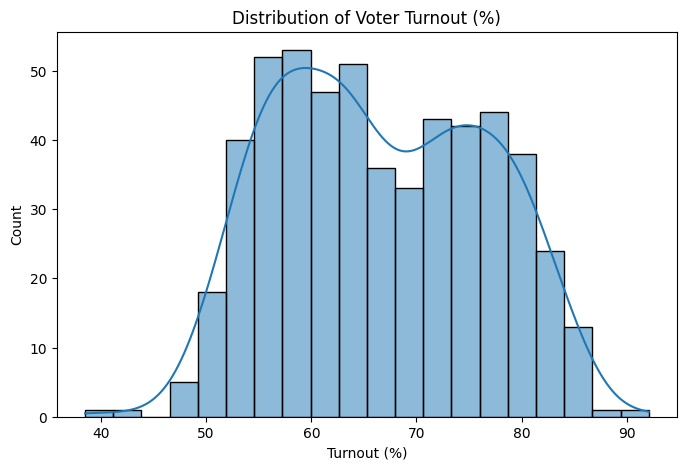

In [37]:
# Voter Turnout Distribution
plt.figure(figsize=(8,5))
sns.histplot(results["polled__"], bins=20, kde=True)
plt.title("Distribution of Voter Turnout (%)")
plt.xlabel("Turnout (%)")
plt.show()

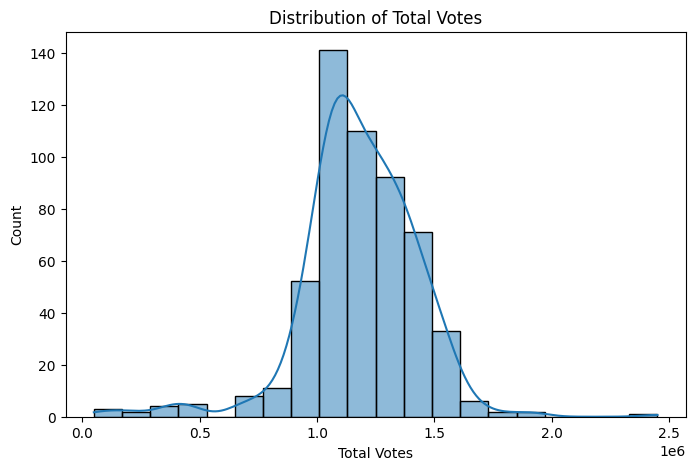

In [38]:
# Votes Distribution
plt.figure(figsize=(8,5))
sns.histplot(results["total_votes"], bins=20, kde=True)
plt.title("Distribution of Total Votes")
plt.xlabel("Total Votes")
plt.show()


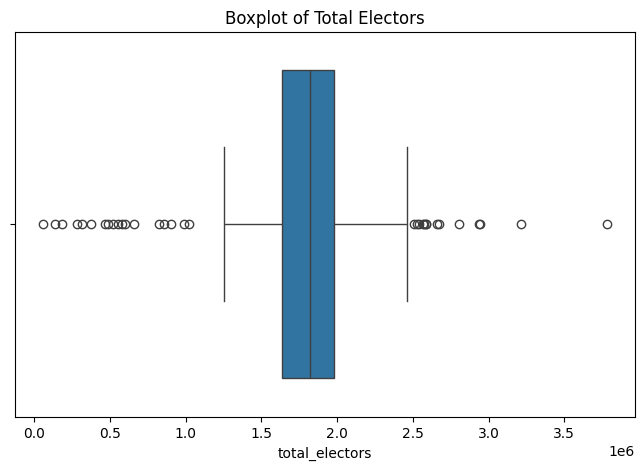

In [39]:
# Electors Distribution (Boxplot for outliers)
plt.figure(figsize=(8,5))
sns.boxplot(x=results["total_electors"])
plt.title("Boxplot of Total Electors")
plt.show()

C:\Users\himab\AppData\Local\Temp\ipykernel_19904\399447548.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y = 'Amount spent (INR)', data = state_ad_spend , estimator = sum,palette='viridis',ci=None)
C:\Users\himab\AppData\Local\Temp\ipykernel_19904\399447548.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y = 'Amount spent (INR)', data = state_ad_spend , estimator = sum,palette='viridis',ci=None)


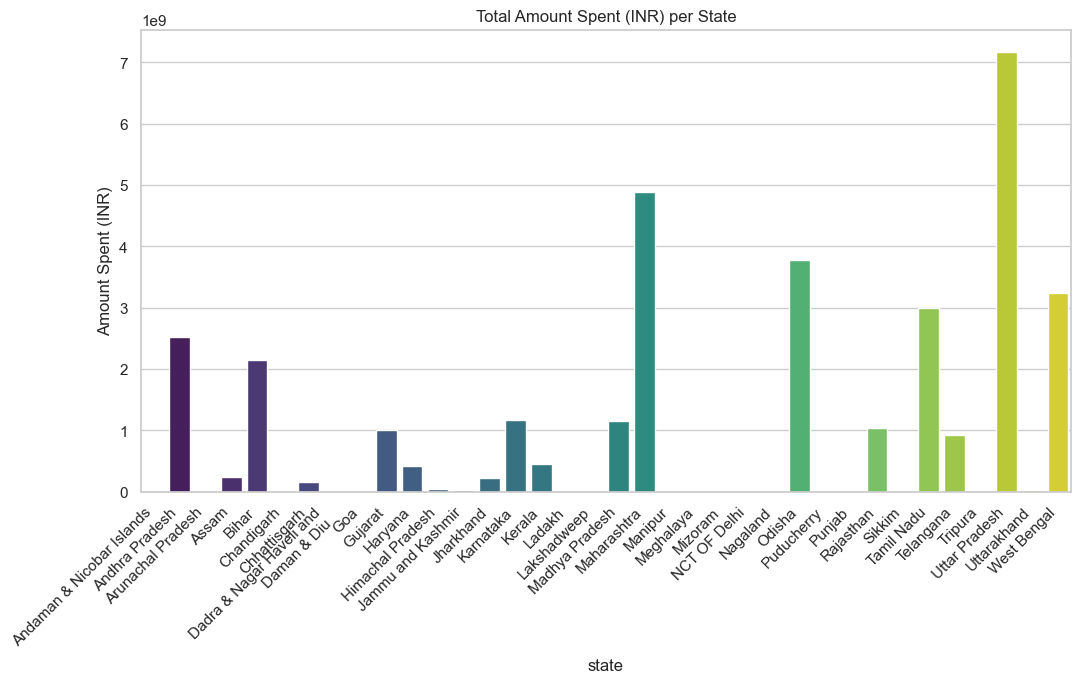

In [44]:
state_ad_spend = merged_data.groupby('state')['Amount spent (INR)'].sum().reset_index()
state_ad_spend

sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x='state', y = 'Amount spent (INR)', data = state_ad_spend , estimator = sum,palette='viridis',ci=None)
plt.xticks(rotation=45, ha='right')
plt.title('Total Amount Spent (INR) per State')
plt.xlabel('state')
plt.ylabel('Amount Spent (INR)')
plt.show()

In [46]:
print(results.columns)

Index(['state', 'pc_name', 'total_electors', 'polled__', 'total_votes',
       'phase'],
      dtype='object')


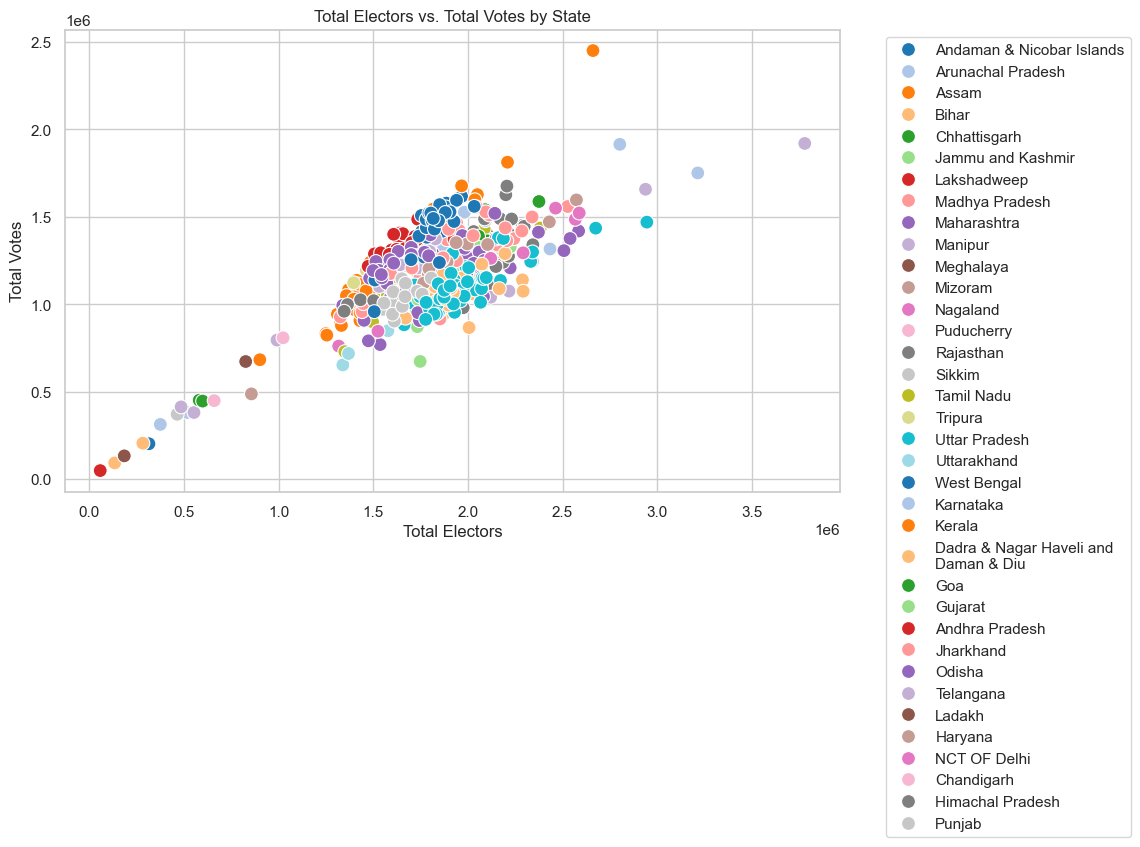

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='total_electors',y='total_votes', hue = 'state',data = merged_data,palette='tab20',s=100)
plt.title('Total Electors vs. Total Votes by State')
plt.xlabel('Total Electors')
plt.ylabel('Total Votes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

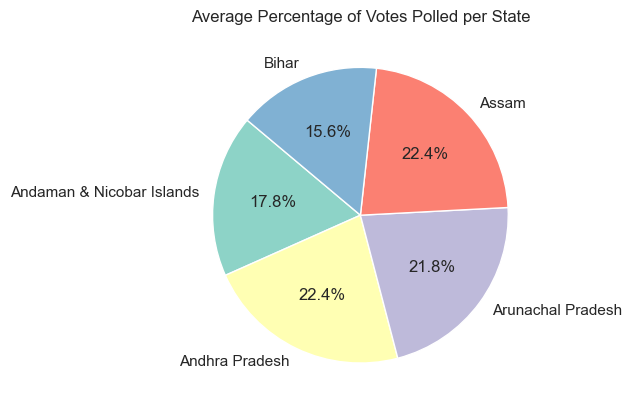

In [48]:
state_polled = merged_data.groupby('state')['polled__'].mean().head()
plt.pie(state_polled,labels=state_polled.index,autopct = '%1.1f%%', startangle = 140,
        colors = sns.color_palette("Set3",len(state_polled)))
plt.title('Average Percentage of Votes Polled per State')
plt.show()

C:\Users\himab\AppData\Local\Temp\ipykernel_19904\2482267307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='phase',y='polled__', data = merged_data , palette = 'cubehelix')


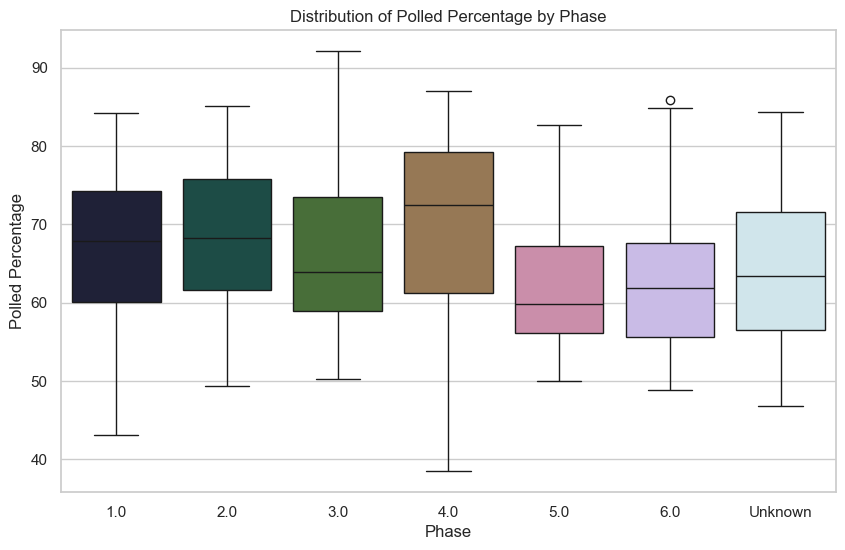

In [49]:
plt.figure(figsize=(10,6))

sns.boxplot(x='phase',y='polled__', data = merged_data , palette = 'cubehelix')
plt.title('Distribution of Polled Percentage by Phase')
plt.xlabel('Phase')
plt.ylabel('Polled Percentage')
plt.show()

Displays the distribution of polled percentages across different phases. It helps to identify the spread and any outliers in voting percentages across phases.

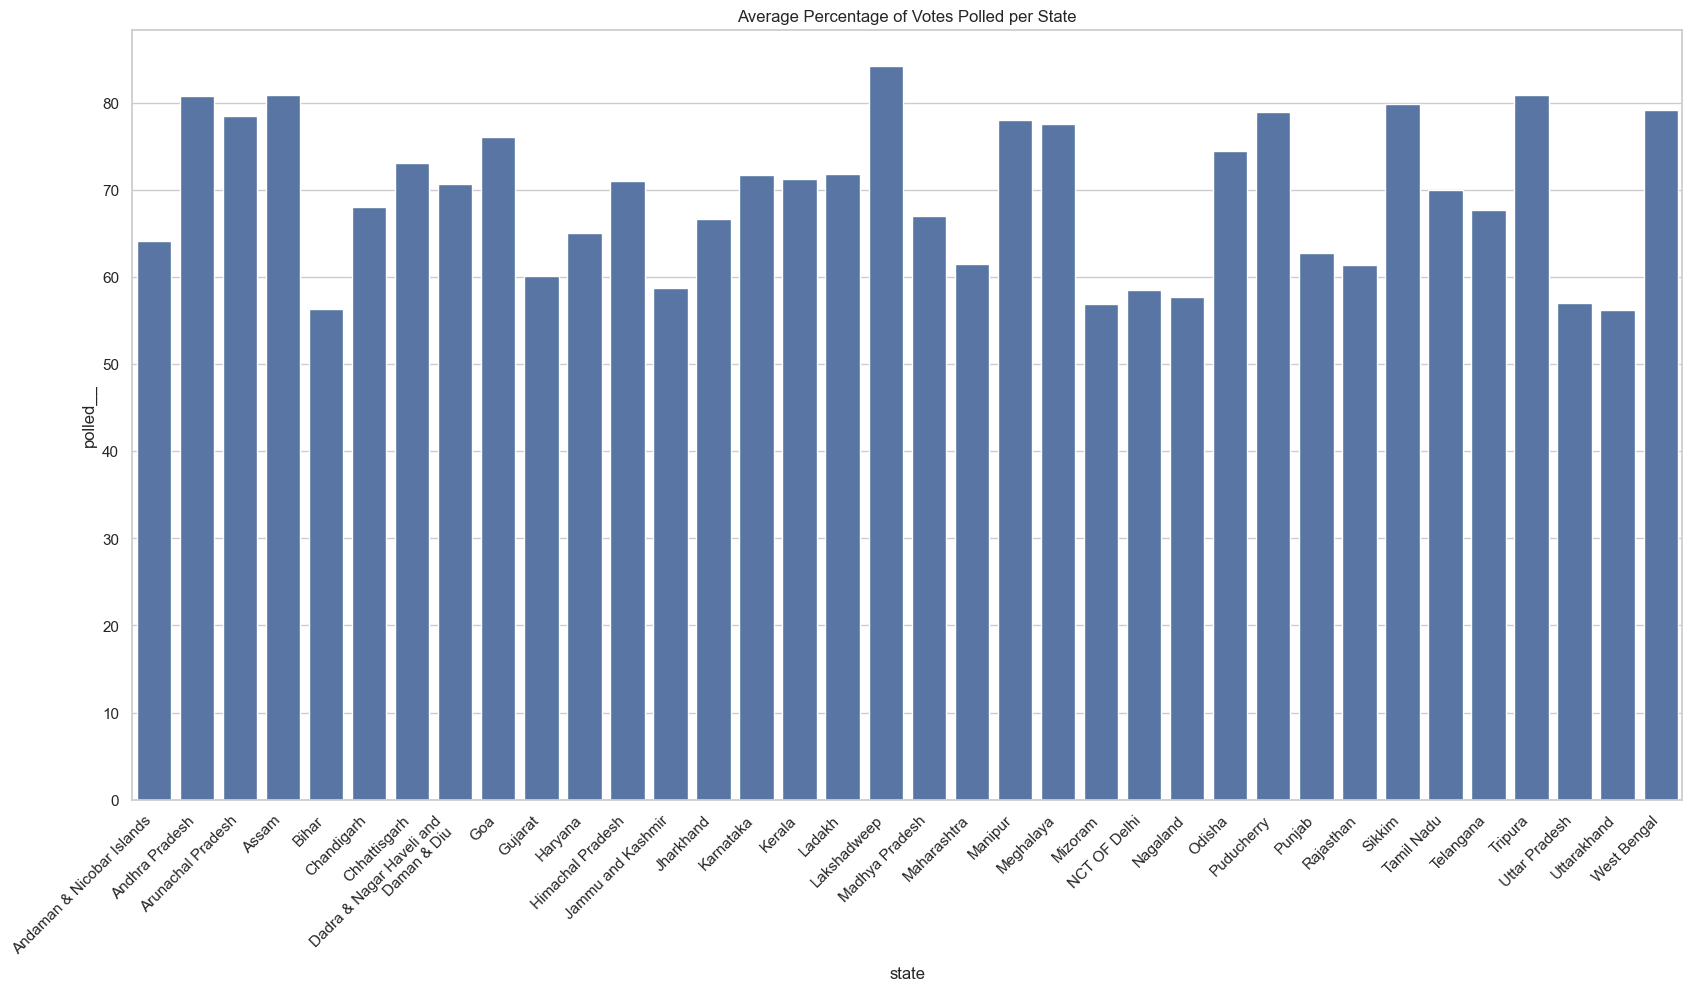

In [51]:
plt.figure(figsize=(20,10))

state_polled = merged_data.groupby('state')['polled__'].mean().reset_index()
sns.barplot(x='state', y = 'polled__',data = state_polled)
plt.title('Average Percentage of Votes Polled per State')
plt.xticks(rotation=45, ha='right')
plt.show()

Lakshadweep has the highest average voter turnout at nearly 80%, followed closely by Tripura and Assam. States like Andhra Pradesh, Sikkim, and West Bengal also show high voter engagement, with turnouts above 70%. On the other end of the spectrum, states such as Bihar, Uttar Pradesh, and Uttarakhand have the lowest average voter turnout, around 50-55%.

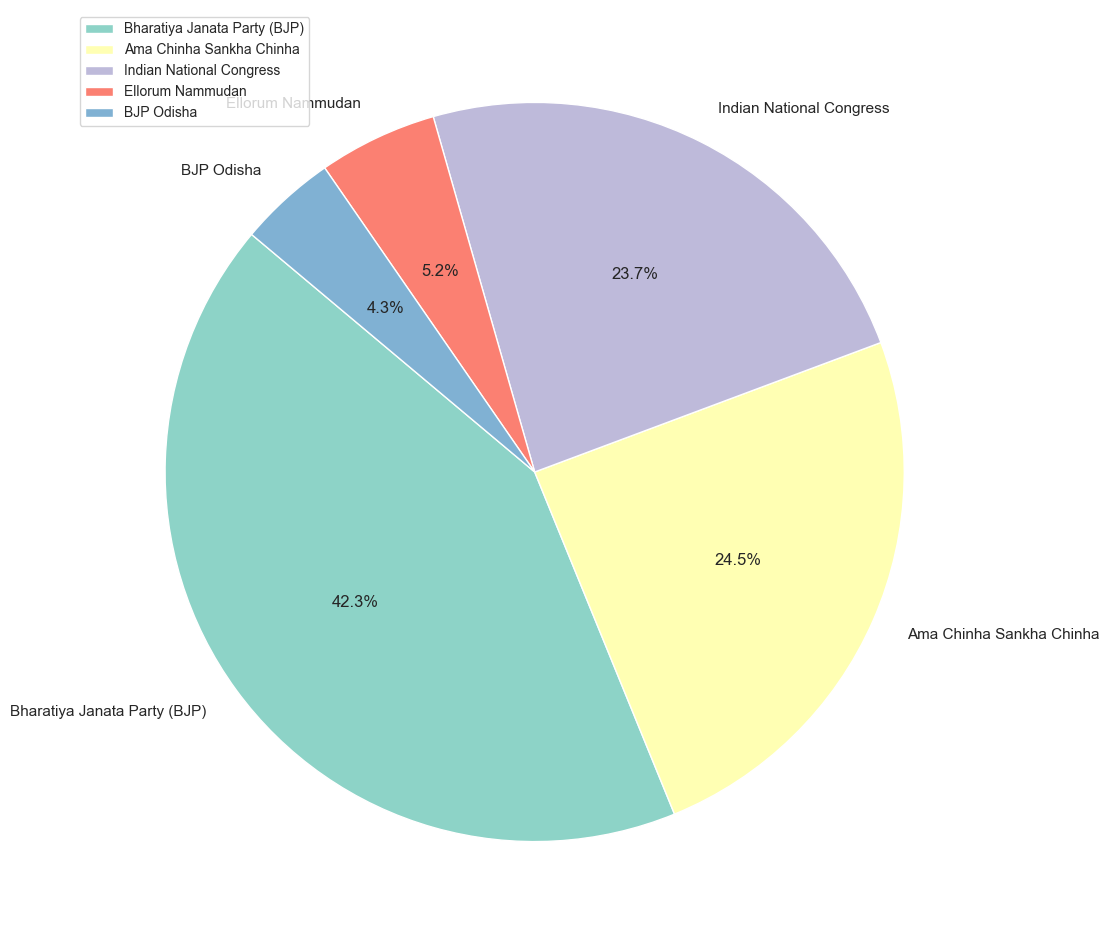

In [53]:
advertisers['Amount spent (INR)'] = pd.to_numeric(advertisers['Amount spent (INR)'],errors='coerce')
advertisers.dropna(subset = ['Amount spent (INR)'],inplace = True)

party_ad_spend = advertisers.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending=False)
top_5_parties = party_ad_spend.head().reset_index()
top_5_parties

plt.figure(figsize=(12,12))
plt.pie(
    top_5_parties['Amount spent (INR)'],
    labels=top_5_parties['Page name'], 
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set3")
)
plt.legend(loc='upper left',fontsize='small')
plt.show()

Bharatiya Janata Party (BJP) has the highest ad spend, accounting for 42.3% of the total. This is followed by the Ama Chinha Sankha Chinha party at 24.5% and the Indian National Congress at 23.7%. Ellorum Nammudan and BJP Odisha have significantly lower ad spends, at 5.19% and 4.27%, respectively. It indicates that BJP dominates in terms of ad spending on Facebook and Instagram ads, with nearly half of the total expenditure, suggesting a significant investment in advertising compared to other parties.

In [54]:
merged_data.columns

Index(['state', 'pc_name', 'total_electors', 'polled__', 'total_votes',
       'phase', 'Location name', 'Amount spent (INR)'],
      dtype='object')

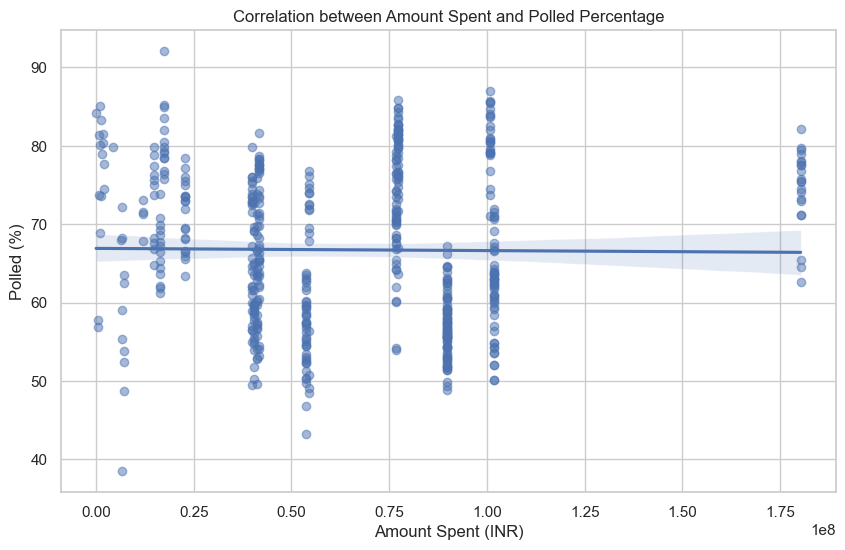

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_data, x='Amount spent (INR)', y='polled__', scatter_kws={'alpha':0.5})

# Title and labels
plt.title('Correlation between Amount Spent and Polled Percentage')
plt.xlabel('Amount Spent (INR)')
plt.ylabel('Polled (%)')

plt.show()

The scatter plot shows no strong correlation between Amount spent (INR) and Polled (%), as indicated by the nearly flat regression line. This suggests that higher ad spending does not necessarily increase the polling percentage. The wide spread of points implies other factors may influence polling outcomes.

In [56]:

correlation = merged_data[['Amount spent (INR)', 'polled__']].corr()
print(correlation)

                    Amount spent (INR)  polled__
Amount spent (INR)            1.000000 -0.010688
polled__                     -0.010688  1.000000


The correlation matrix shows that the relationship between the amount spent (INR) and the percentage of votes polled (%) is very weak and slightly negative, with a correlation coefficient of -0.010688. This indicates that there is virtually no linear relationship between ad spend and voter turnout. In other words, increasing the amount spent on advertising does not significantly affect the percentage of voter turnout.

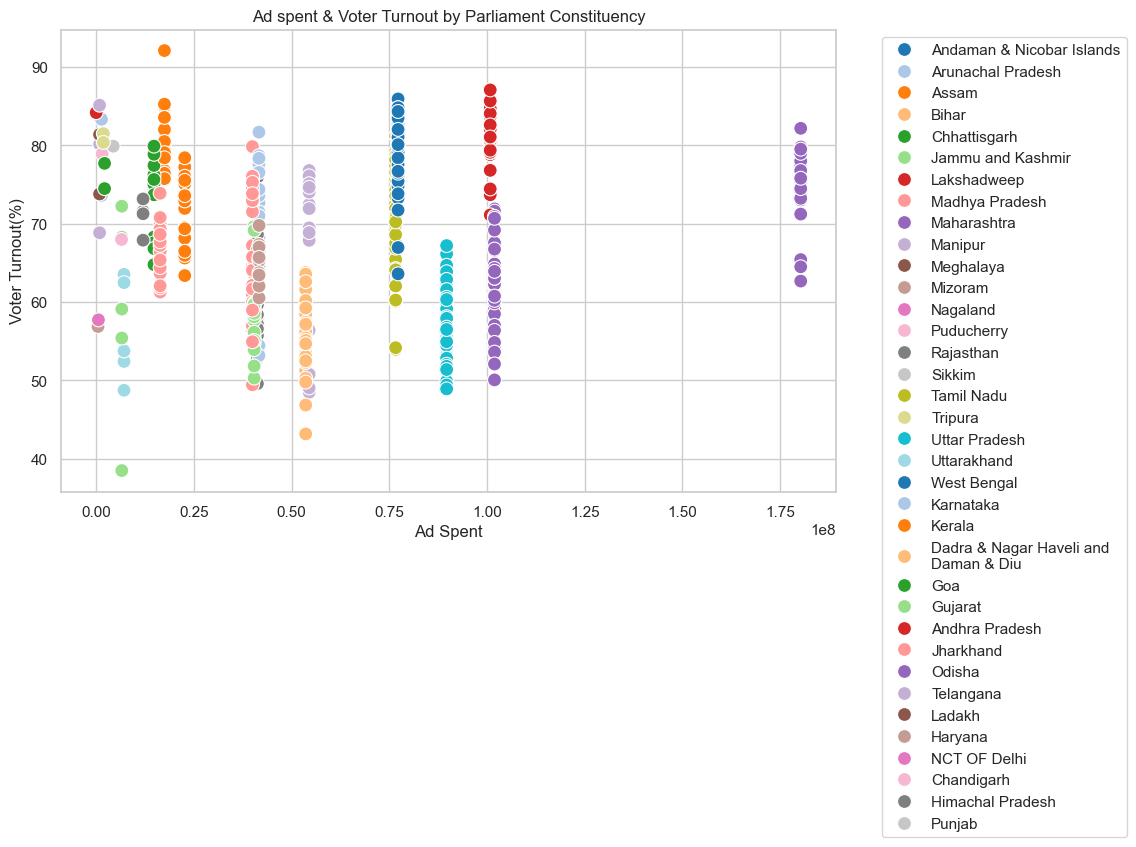

In [57]:
merged_constituency_data = results.merge(locations,left_on = 'state',right_on = 'Location name',how='left')

plt.figure(figsize=(10,6))
sns.scatterplot(x='Amount spent (INR)',y='polled__',hue='state',
                data= merged_constituency_data,palette='tab20',s=100)
plt.title('Ad spent & Voter Turnout by Parliament Constituency')
plt.xlabel('Ad Spent')
plt.ylabel('Voter Turnout(%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

higher ad spending does not necessarily correlate with higher voter turnout. Voter turnout seems to cluster between 60% and 80% across most constituencies, regardless of the ad spend amount, which ranges from 0 to 150 million INR. This suggests that other factors besides ad spend may play a significant role in influencing voter turnout.

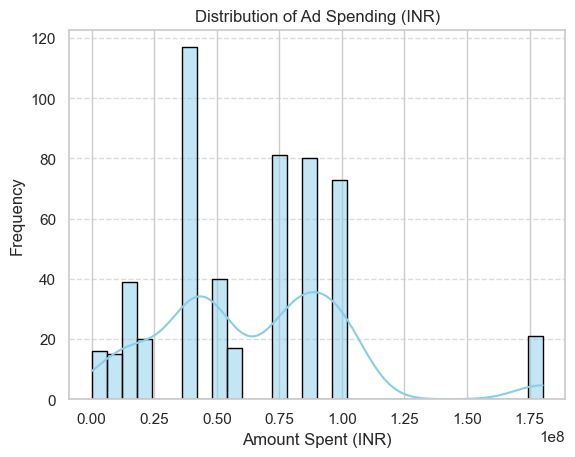

In [58]:
sns.histplot(x='Amount spent (INR)', bins=30, data=merged_data, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Ad Spending (INR)')
plt.xlabel('Amount Spent (INR)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

histogram indicates that most constituencies have ad spends clustered around the 50M and 100M INR marks, with fewer constituencies spending less than 10M INR or more than 150M INR. The box plot highlights that the median ad spend is around 70M INR, with the interquartile range (IQR) spanning from approximately 30M to 110M INR. There are a few outliers, particularly a constituency with an exceptionally high ad spend above 150M INR. This distribution suggests that while the majority of ad spends are concentrated within a certain range, there are notable exceptions with significantly higher expenditures.